In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('weather_2025_cleaned.csv', parse_dates=['DATE'], index_col='DATE')

In [3]:
print(df.head())

                     year  month  day  hour  tmp_c  dew_c  slp_hpa  vis_m  \
DATE                                                                        
2025-01-01 00:00:00  2025      1    1     0   18.2   12.2   1018.3   4000   
2025-01-01 03:00:00  2025      1    1     3   20.7   13.1   1019.2   4000   
2025-01-01 06:00:00  2025      1    1     6   21.3   13.5   1016.6  10000   
2025-01-01 09:00:00  2025      1    1     9   20.1   14.0   1015.0   4000   
2025-01-01 12:00:00  2025      1    1    12   18.4   14.6   1015.9   4000   

                     cloud_ceiling  wind_dir  wind_speed      STATION  \
DATE                                                                    
2025-01-01 00:00:00     3047969.52     360.0        60.0  48839099999   
2025-01-01 03:00:00     3047969.52      50.0        60.0  48839099999   
2025-01-01 06:00:00     3047969.52     360.0        50.0  48839099999   
2025-01-01 09:00:00     3047969.52      50.0        40.0  48839099999   
2025-01-01 12:00:00   

In [4]:
df.dtypes

year                int64
month               int64
day                 int64
hour                int64
tmp_c             float64
dew_c             float64
slp_hpa           float64
vis_m               int64
cloud_ceiling     float64
wind_dir          float64
wind_speed        float64
STATION             int64
STATION_FOLDER     object
dtype: object

In [5]:
y = df['tmp_c']
y = y.resample("D").mean()   
model = auto_arima(y,
                   start_p=0, start_q=0,
                   max_p=2, max_q=2,  
                   d=1,
                   seasonal=False,
                   stepwise=True,
                   suppress_warnings=True,
                   error_action="ignore")
print(model.summary())

c:\Users\84927\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\84927\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\84927\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\84927\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\84927\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\8

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  235
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -265.250
Date:                Mon, 15 Sep 2025   AIC                            540.499
Time:                        04:49:03   BIC                            557.776
Sample:                    01-01-2025   HQIC                           547.465
                         - 08-23-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0110      0.007      1.681      0.093      -0.002       0.024
ar.L1          1.0660      0.076     13.942      0.000       0.916       1.216
ar.L2         -0.4288      0.067     -6.360      0.0

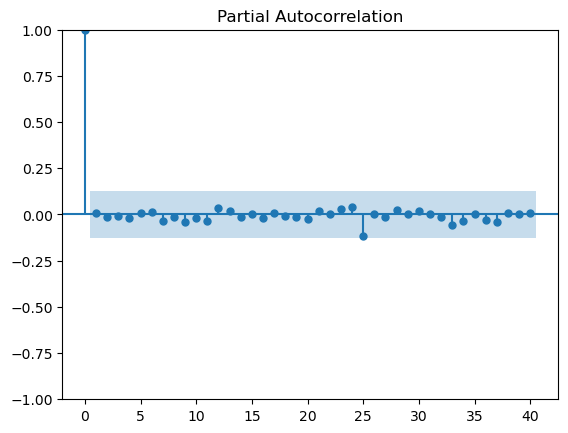

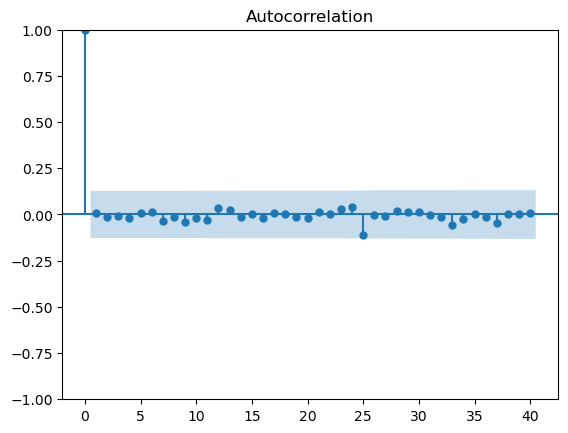

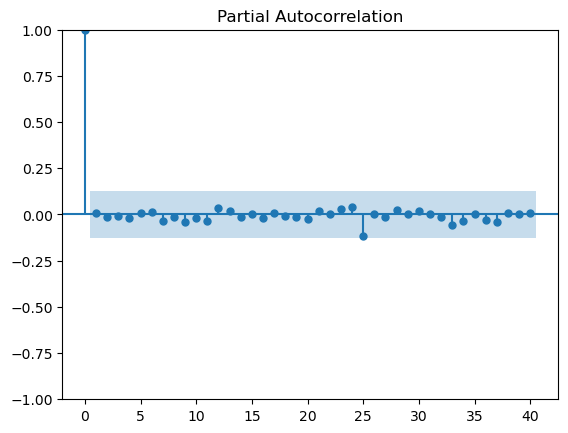

In [6]:
model = sm.tsa.SARIMAX(y, order=(2,1,1))
model_fit = model.fit()

sm.graphics.tsa.plot_acf(model_fit.resid, lags=40)
sm.graphics.tsa.plot_pacf(model_fit.resid, lags=40)

In [7]:
ts = df["tmp_c"]
ts_daily = ts.resample("D").mean()
ts_daily = ts_daily.dropna()

c:\Users\84927\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\84927\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


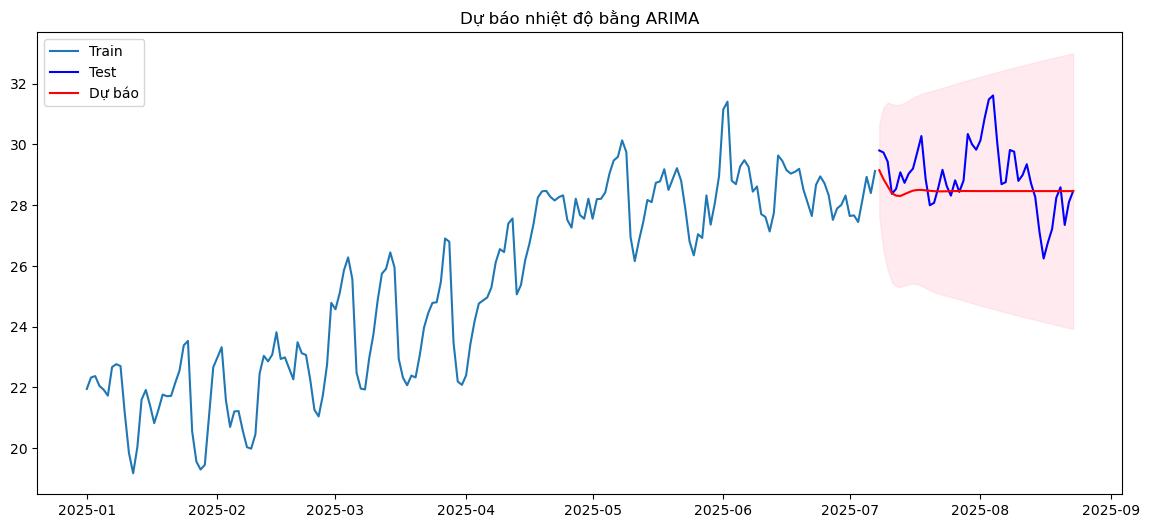

In [8]:
train_size = int(len(ts_daily) * 0.8)
train, test = ts_daily[:train_size], ts_daily[train_size:]

model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps=len(test))
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="blue")
plt.plot(predicted_mean.index, predicted_mean, label="Dự báo", color="red")
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color="pink", alpha=0.3)
plt.legend()
plt.title("Dự báo nhiệt độ bằng ARIMA")
plt.show()


In [9]:
df.index = pd.to_datetime(df.index)
daily_temp = df['tmp_c'].resample('D').mean()

c:\Users\84927\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\84927\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


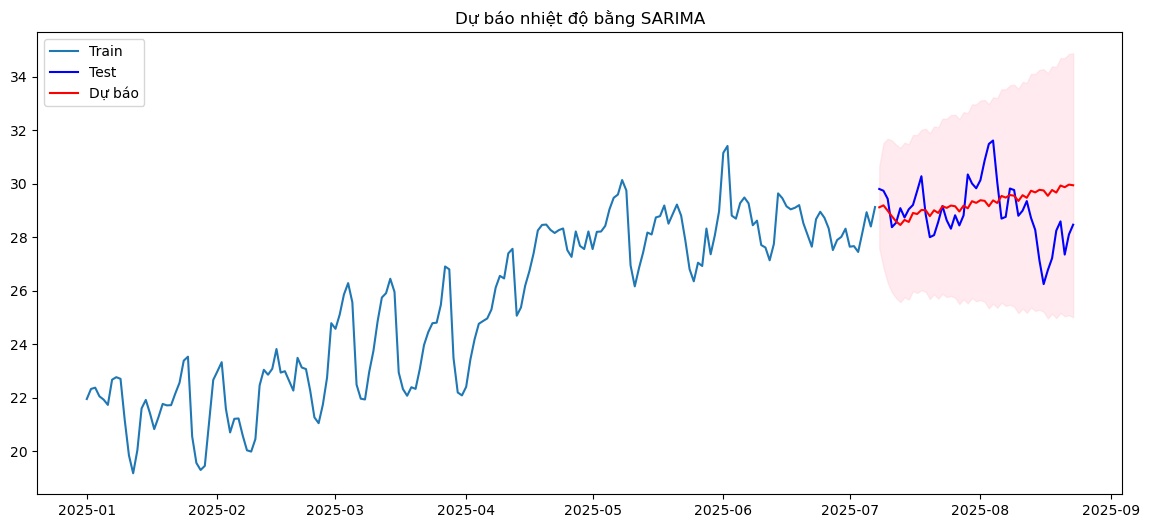

In [10]:
train_size = int(len(daily_temp) * 0.8)
train, test = daily_temp[:train_size], daily_temp[train_size:]

model = SARIMAX(train, order=(5,1,2), seasonal_order=(1,1,1,7))
model_fit = model.fit(disp=False)

forecast = model_fit.get_forecast(steps=len(test))
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(14,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='blue')
plt.plot(predicted_mean, label='Dự báo', color='red')
plt.fill_between(conf_int.index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title("Dự báo nhiệt độ bằng SARIMA")
plt.legend()
plt.show()


In [11]:
def arima_forecast_plot(data, col, order=(1,1,1), seasonal_order=None, steps=30, freq='D'):
    """
    data: pd.Series (index datetime)
    col: tên cột dự báo
    order: (p,d,q)
    seasonal_order: (P,D,Q,s) hoặc None
    steps: số bước dự báo
    freq: tần suất dự báo (vd: 'D' ngày, 'H' giờ)
    """
    y = data[col].dropna()
    
    # Fit model
    if seasonal_order:
        model = SARIMAX(y, order=order, seasonal_order=seasonal_order)
    else:
        model = ARIMA(y, order=order)
    res = model.fit()
    
    # Forecast
    last_date = y.index.max()
    future_idx = pd.date_range(start=last_date + pd.Timedelta(1, unit=freq), periods=steps, freq=freq)
    forecast_res = res.get_forecast(steps=steps)
    pred = forecast_res.predicted_mean
    ci = forecast_res.conf_int()
    
    pred.index = future_idx
    ci.index = future_idx
    
    # Plot
    plt.figure(figsize=(12,5))
    plt.plot(y.index, y, label='Thực tế')
    plt.plot(pred.index, pred, label='Dự báo', color='red')
    plt.fill_between(ci.index, ci.iloc[:,0], ci.iloc[:,1], color='pink', alpha=0.3)
    plt.title(f"Dự báo ARIMA cho {col}")
    plt.xlabel('Thời gian')
    plt.ylabel(col)
    plt.legend()
    plt.show()

In [12]:
numeric_cols = df.select_dtypes(include='number').columns
dataset_daily = df[numeric_cols].resample('D').mean()

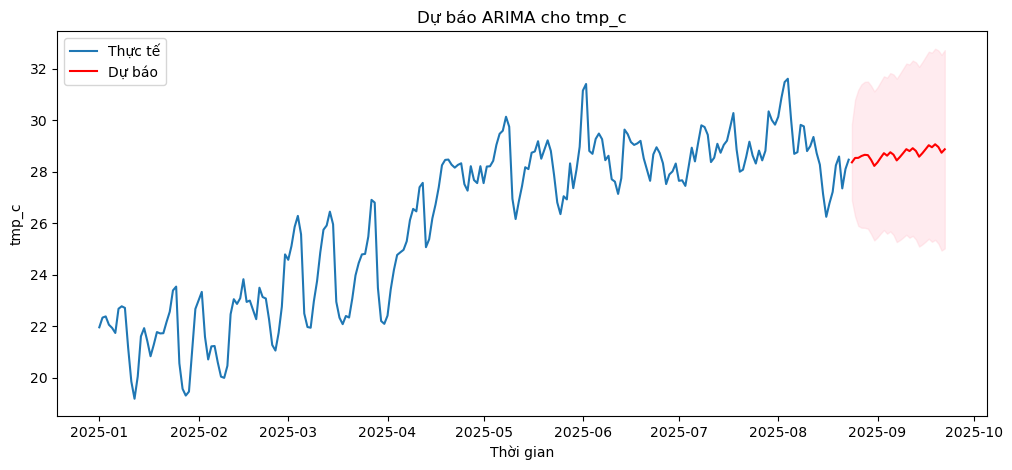

In [13]:
arima_forecast_plot(dataset_daily, 'tmp_c', order=(2,1,2), seasonal_order=(1,1,1,7), steps=30, freq='D')

c:\Users\84927\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\84927\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


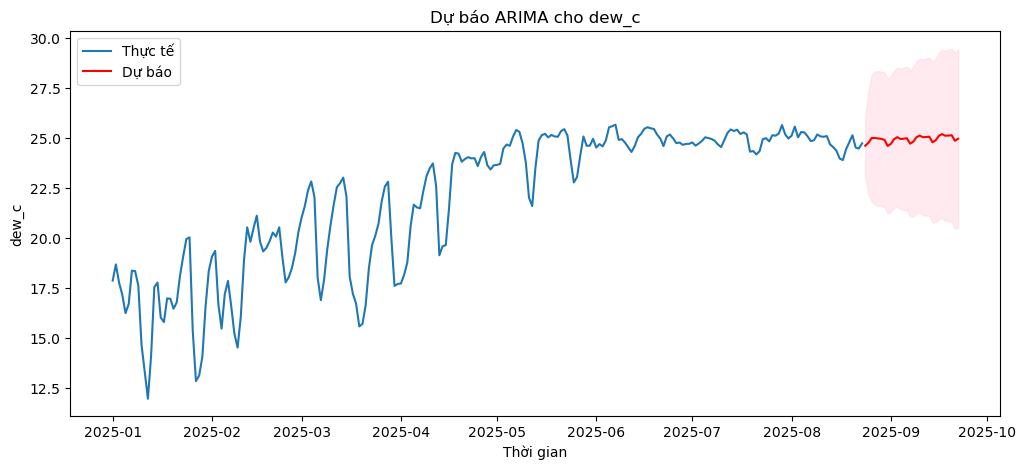

In [14]:
arima_forecast_plot(dataset_daily, 'dew_c', order=(2,1,2), seasonal_order=(1,1,1,7), steps=30, freq='D')

In [18]:
import dask.dataframe as dd

In [19]:
df = dd.read_csv('weather_cleaned.csv')

In [23]:
df["date"] = dd.to_datetime(df["date"], errors="coerce")

In [24]:
df.head()

,date,year,month,day,tmp_c,dew_c,slp_hpa,vis_m,cloud_ceiling,wind_dir,wind_speed,station,call_sign,report_type,quality_control
0,1967-07-31 23:00:00,1967,7,31,26.8,21.8,1002.9,16000.0,2400.0,230.0,1.0,48855699999,IAHO,SAO,V020
1,1967-08-01 00:00:00,1967,8,1,27.4,22.4,1003.2,16000.0,2400.0,240.0,1.0,48855699999,IAHO,SAO,V020
2,1967-08-01 01:00:00,1967,8,1,29.1,21.8,1003.6,16000.0,22000.0,240.0,1.0,48855699999,IAHO,SAO,V020
3,1967-08-01 02:00:00,1967,8,1,30.2,22.4,1003.9,16000.0,22000.0,210.0,2.6,48855699999,IAHO,SAO,V020
4,1967-08-01 03:00:00,1967,8,1,31.3,21.3,1003.9,16000.0,22000.0,220.0,3.6,48855699999,IAHO,SAO,V020


In [25]:
df.dtypes

date                datetime64[ns]
year                         int64
month                        int64
day                          int64
tmp_c                      float64
dew_c                      float64
slp_hpa                    float64
vis_m                      float64
cloud_ceiling              float64
wind_dir                   float64
wind_speed                 float64
station                      int64
call_sign          string[pyarrow]
report_type        string[pyarrow]
quality_control    string[pyarrow]
dtype: object

In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings("ignore")

# 1) Đọc và aggregate bằng Dask
csv_path = "weather_cleaned.csv"  # chỉnh nếu khác
dtypes = {
    "date": "object",
    "tmp_c": "float64",
    # nếu còn cột khác, không cần load hết nếu không dùng
}
# đọc chỉ các cột cần thiết để tiết kiệm memory
df = dd.read_csv(csv_path, usecols=["date","tmp_c"], dtype=dtypes)

# chuyển cột 'date' -> datetime & extract ngày (normalize to date)
df["date"] = dd.to_datetime(df["date"], errors="coerce")
# drop missing date
df = df.dropna(subset=["date"])

# aggregate theo ngày (mean temperature)
# nếu dữ liệu có timezone hoặc timestamps, bạn có thể floor tới ngày: df["day"] = df["date"].dt.normalize()
df["day"] = df["date"].dt.floor("D")
daily = df.groupby("day")["tmp_c"].mean().reset_index().rename(columns={"tmp_c":"tmp_c_mean"})
# compute -> chuyển về pandas (nó sẽ nhỏ hơn rất nhiều: ~ số ngày)
daily_pd = daily.compute()
daily_pd = daily_pd.sort_values("day").reset_index(drop=True)
daily_pd["day"] = pd.to_datetime(daily_pd["day"])
daily_pd = daily_pd.set_index("day")
series = daily_pd["tmp_c_mean"].asfreq("D")  # tạo index đều cho những ngày thiếu

print("Daily series length:", len(series))

# 2) Tiền xử lý
# xử lý missing bằng interpolation (hoặc forward fill)
series = series.interpolate("time").fillna(method="bfill").fillna(method="ffill")

# chuyển biến đổi nếu cần (tùy dữ liệu) - comment nếu không muốn
# from scipy import stats
# series_boxcox, lam = stats.boxcox(series + 273.15)  # ví dụ nếu cần làm positive
# sử dụng series_boxcox khi train

# 3) Chia train/test
horizon = 14  # dự báo 14 ngày cuối
train_end = -horizon
train = series[:train_end]
test = series[train_end:]

print("Train days:", len(train), "Test days:", len(test))

# 4) Tự động chọn mô hình (Auto ARIMA) trên sample train để tiết kiệm thời gian
# Lưu ý: auto_arima chạy lâu, bạn có thể chạy trên một sample hoặc giảm seasonal m nếu muốn.
# Ví dụ: seasonal period m = 365 (nếu có season hàng năm) hoặc m=7 nếu weekly.
auto = auto_arima(
    train,
    seasonal=True,
    m=365,                # điều chỉnh nếu seasonality khác (7 cho weekly)
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
    max_p=5, max_q=5, max_P=2, max_Q=2,
    information_criterion="aic",
    n_jobs=-1
)
print("Auto ARIMA summary:")
print(auto.summary())

# 5) Fit final model (SARIMAX) theo order do auto_arima gợi ý
order = auto.order         # (p,d,q)
seasonal_order = auto.seasonal_order  # (P,D,Q,m)
print("Chosen order:", order, "Seasonal order:", seasonal_order)

model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())

# 6) Forecast
n_forecast = horizon
pred = res.get_forecast(steps=n_forecast)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

# 7) Evaluate
y_true = test[:n_forecast]
mae = mean_absolute_error(y_true, pred_mean)
rmse = np.sqrt(mean_squared_error(y_true, pred_mean))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# 8) Plot kết quả
plt.figure(figsize=(12,6))
plt.plot(train.index[-365:], train[-365:], label="Train (last 365d)")
plt.plot(test.index, test, label="Test", linestyle="--")
plt.plot(pred_mean.index, pred_mean, label="Forecast")
plt.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], alpha=0.3)
plt.legend()
plt.title("SARIMAX forecast of tmp_c (daily mean)")
plt.show()

# 9) Walk-forward (optional) - ví dụ simple expanding window forecast
def walk_forward_forecast(series, initial_train_days=365*3, horizon=14, order=order, seasonal_order=seasonal_order):
    """
    Trả về list of forecasts và metrics cho mỗi bước. 
    CHÚ Ý: tốn thời gian vì fit lại model nhiều lần.
    """
    forecasts = []
    true_vals = []
    dates = []
    for start in range(initial_train_days, len(series) - horizon, horizon):
        train = series[:start]
        test = series[start:start+horizon]
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        res = model.fit(disp=False)
        pred = res.get_forecast(steps=horizon)
        forecasts.append(pred.predicted_mean.values)
        true_vals.append(test.values)
        dates.append(test.index)
        print(f"walk step {start} done")
    return forecasts, true_vals, dates

# (không chạy walk-forward tự động trong script, dùng khi cần)
# 10) Lưu model
import pickle
with open("sarimax_model.pkl", "wb") as f:
    pickle.dump(res, f)

print("Model saved to sarimax_model.pkl")


Daily series length: 24626
Train days: 24612 Test days: 14
Performing stepwise search to minimize aic
